In [1]:
import numpy as np
import pandas as pd
from simulator import simulator
from ads import ADS
import glob
import re

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap

# Benchmark Experiments

In [2]:
cols = ['avg_ut', 'avg_ut_speed', 'avg_ut_in', 'avg_ut_out', 'n_accidents',
       'n_fat_in', 'n_fat_out', 'n_inj_in', 'n_inj_out', 'trip_duration',
       'crashes', 'skids', 'weight_comfort', 'weight_sec_in', 'n_fat', 'n_inj']

results_df = pd.DataFrame(data=None, columns=cols)

for i in glob.glob("results/exp5/*.csv"):
    df = pd.read_csv(i)
    df["n_fat"] = df["n_fat_in"] +  df["n_fat_out"]
    df["n_inj"] = df["n_inj_in"] +  df["n_inj_out"]
    df["weight_comfort"] = float(re.findall("\d+\.\d+",  i)[0])
    df["weight_sec_in"] = float(re.findall("\d+\.\d+",  i)[1])
    results_df = pd.concat([results_df, df])

/home/roi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


/home/roi/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


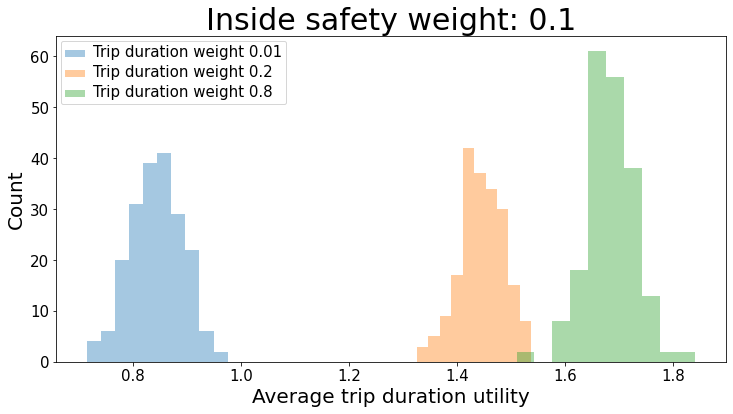

In [3]:
w1=0.01
w2=0.2
w3=0.8
tt1 = results_df[(results_df.weight_comfort == w1) & (results_df.weight_sec_in == 0.1)]
tt2 = results_df[(results_df.weight_comfort == w2) & (results_df.weight_sec_in == 0.1)]
tt3 = results_df[(results_df.weight_comfort == w3) & (results_df.weight_sec_in == 0.1)]

fig, ax = plt.subplots(figsize=(12,6))
#for a in [x, y]:
sns.distplot(tt1.avg_ut_speed, bins= 10, ax=ax, kde=False, label= 'Trip duration weight ' + str(w1))
sns.distplot(tt2.avg_ut_speed, bins= 10, ax=ax, kde=False, label= 'Trip duration weight ' + str(w2))
sns.distplot(tt3.avg_ut_speed, bins= 10, ax=ax, kde=False, label= 'Trip duration weight ' + str(w3))

ax.legend()
plt.setp(ax.get_legend().get_texts(), fontsize='15')

ax.set_xlabel('Average trip duration utility', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.tick_params(labelsize=15)
plt.title('Inside safety weight: 0.1', fontsize=30)

ax.figure.savefig('figs/bench1.png')

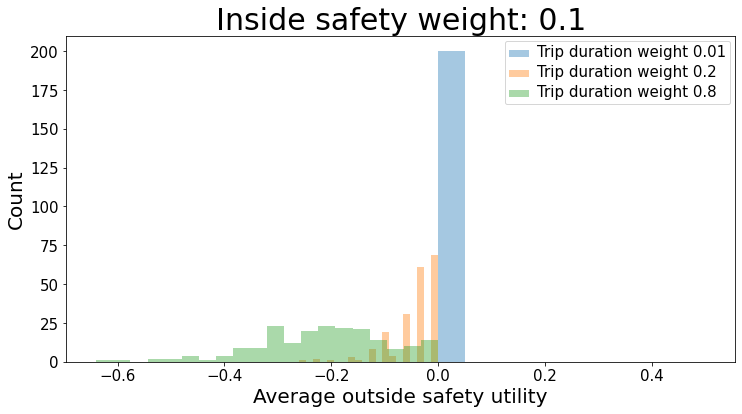

In [4]:
w1=0.01
w2=0.2
w3=0.8
tt1 = results_df[(results_df.weight_comfort == w1) & (results_df.weight_sec_in == 0.1)]
tt2 = results_df[(results_df.weight_comfort == w2) & (results_df.weight_sec_in == 0.1)]
tt3 = results_df[(results_df.weight_comfort == w3) & (results_df.weight_sec_in == 0.1)]

fig, ax = plt.subplots(figsize=(12,6))
#for a in [x, y]:
sns.distplot(tt1.avg_ut_out, bins= 20, ax=ax, kde=False, label= 'Trip duration weight ' + str(w1))
sns.distplot(tt2.avg_ut_out, bins= 20, ax=ax, kde=False, label= 'Trip duration weight ' + str(w2))
sns.distplot(tt3.avg_ut_out, bins= 20, ax=ax, kde=False, label= 'Trip duration weight ' + str(w3))


ax.legend()
plt.setp(ax.get_legend().get_texts(), fontsize='15')
ax.set_xlabel('Average outside safety utility', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.tick_params(labelsize=15)
plt.title('Inside safety weight: 0.1', fontsize=30)

ax.figure.savefig('figs/bench2.png')

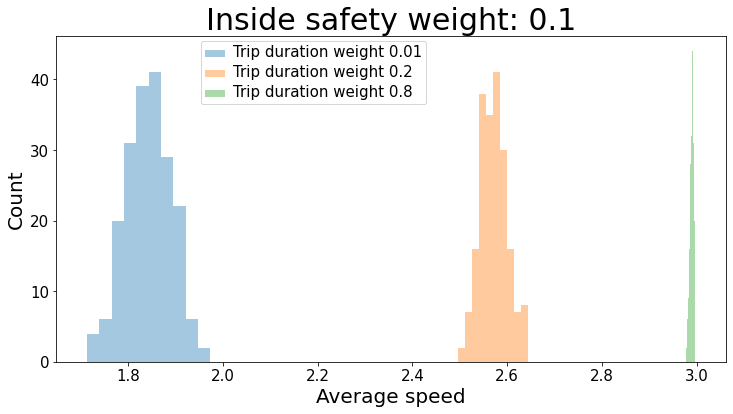

In [12]:
w1=0.01
w2=0.2
w3=0.8
tt1 = results_df[(results_df.weight_comfort == w1) & (results_df.weight_sec_in == 0.1)]
tt2 = results_df[(results_df.weight_comfort == w2) & (results_df.weight_sec_in == 0.1)]
tt3 = results_df[(results_df.weight_comfort == w3) & (results_df.weight_sec_in == 0.1)]

fig, ax = plt.subplots(figsize=(12,6))
#for a in [x, y]:
sns.distplot(1000/tt1.trip_duration, bins= 10, ax=ax, kde=False, label= 'Trip duration weight ' + str(w1))
sns.distplot(1000/tt2.trip_duration, bins= 10, ax=ax, kde=False, label= 'Trip duration weight ' + str(w2))
sns.distplot(1000/tt3.trip_duration, bins= 10, ax=ax, kde=False, label= 'Trip duration weight ' + str(w3))


ax.legend(bbox_to_anchor=(0.56, 1.0))
plt.setp(ax.get_legend().get_texts(), fontsize='15')
ax.set_xlabel('Average speed', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.tick_params(labelsize=15)
plt.title('Inside safety weight: 0.1', fontsize=30)

ax.figure.savefig('figs/bench3.png')

/home/roi/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


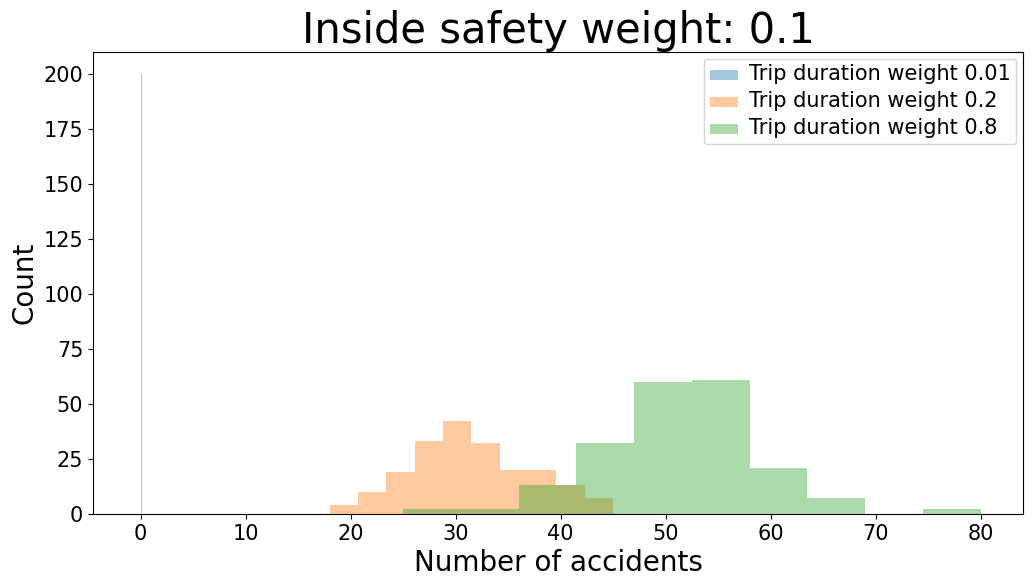

In [57]:
w1=0.01
w2=0.2
w3=0.8
tt1 = results_df[(results_df.weight_comfort == w1) & (results_df.weight_sec_in == 0.1)]
tt2 = results_df[(results_df.weight_comfort == w2) & (results_df.weight_sec_in == 0.1)]
tt3 = results_df[(results_df.weight_comfort == w3) & (results_df.weight_sec_in == 0.1)]

fig, ax = plt.subplots(figsize=(12,6))
#for a in [x, y]:
sns.distplot(tt1.n_accidents, bins= 10, ax=ax, kde=False, label= 'Trip duration weight ' + str(w1))
sns.distplot(tt2.n_accidents, bins= 10, ax=ax, kde=False, label= 'Trip duration weight ' + str(w2))
sns.distplot(tt3.n_accidents, bins= 10, ax=ax, kde=False, label= 'Trip duration weight ' + str(w3))


ax.legend()
plt.setp(ax.get_legend().get_texts(), fontsize='15')
ax.set_xlabel('Number of accidents', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.tick_params(labelsize=15)
#ax.set(ylim = (0,1))
plt.title('Inside safety weight: 0.1', fontsize=30)


ax.figure.savefig('figs/bench4.png')

In [116]:
set(results_df[results_df.weight_comfort == 0.2].weight_sec_in)

{0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7}

/home/roi/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/roi/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/roi/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

Text(0.5, 1.0, 'Weight security inside: 0.1')

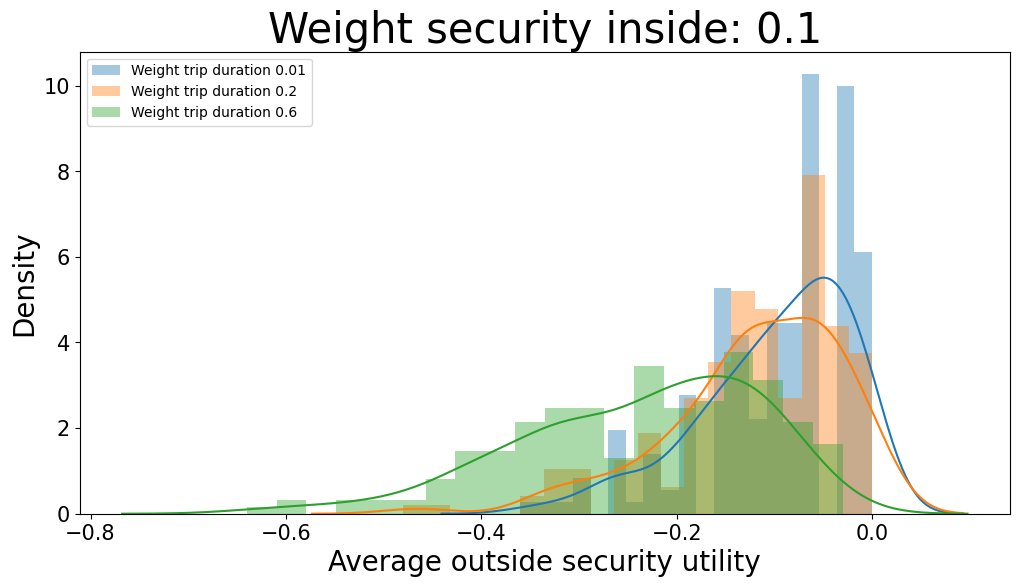

In [101]:
w1=0.01
w2=0.2
w3=0.6
tt1 = results_df[(results_df.weight_sec_in == w1) & (results_df.weight_comfort == 0.3)]
tt2 = results_df[(results_df.weight_sec_in == w2) & (results_df.weight_comfort == 0.3)]
tt3 = results_df[(results_df.weight_sec_in == w3) & (results_df.weight_comfort == 0.3)]

fig, ax = plt.subplots(figsize=(12,6))
#for a in [x, y]:
sns.distplot(tt1.avg_ut_out, bins= 20, ax=ax, kde=True, label= 'Weight trip duration ' + str(w1))
sns.distplot(tt2.avg_ut_out, bins= 20, ax=ax, kde=True, label= 'Weight trip duration ' + str(w2))
sns.distplot(tt3.avg_ut_out, bins= 20, ax=ax, kde=True, label= 'Weight trip duration ' + str(w3))


ax.legend()
ax.set_xlabel('Average outside security utility', fontsize=20)
ax.set_ylabel('Density', fontsize=20)
ax.tick_params(labelsize=15)

plt.title('Weight security inside: 0.1', fontsize=30)

#ax.figure.savefig('figs/bench2.png')

/home/roi/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/roi/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/roi/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

Text(0.5, 1.0, 'Weight security inside: 0.1')

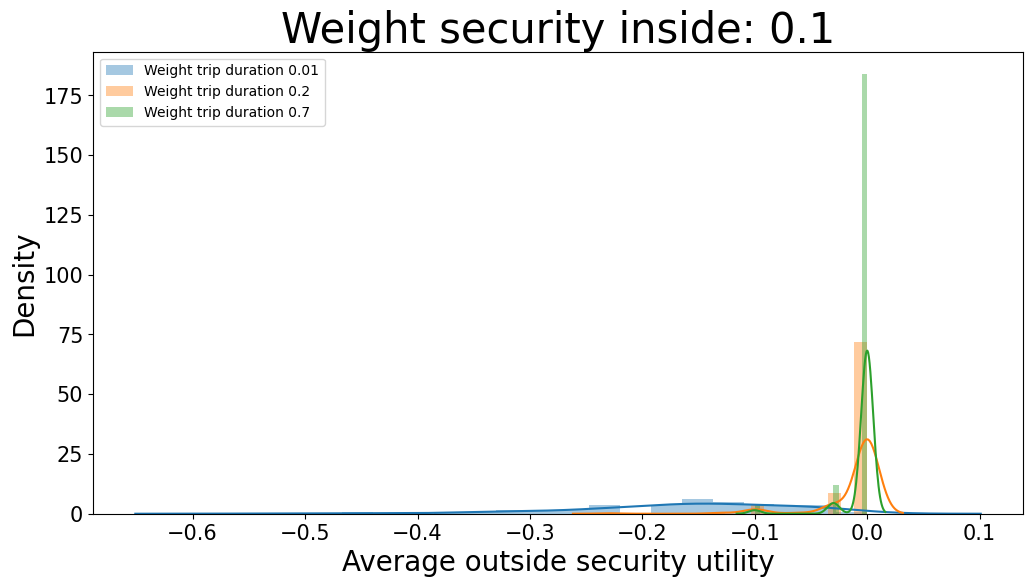

In [117]:
w1=0.01
w2=0.2
w3=0.7
tt1 = results_df[(results_df.weight_sec_in == w1) & (results_df.weight_comfort == 0.2)]
tt2 = results_df[(results_df.weight_sec_in == w2) & (results_df.weight_comfort == 0.2)]
tt3 = results_df[(results_df.weight_sec_in == w3) & (results_df.weight_comfort == 0.2)]

fig, ax = plt.subplots(figsize=(12,6))
#for a in [x, y]:
sns.distplot(tt1.avg_ut_in, bins= 20, ax=ax, kde=True, label= 'Weight trip duration ' + str(w1))
sns.distplot(tt2.avg_ut_in, bins= 20, ax=ax, kde=True, label= 'Weight trip duration ' + str(w2))
sns.distplot(tt3.avg_ut_in, bins= 20, ax=ax, kde=True, label= 'Weight trip duration ' + str(w3))


ax.legend()
ax.set_xlabel('Average outside security utility', fontsize=20)
ax.set_ylabel('Density', fontsize=20)
ax.tick_params(labelsize=15)

plt.title('Weight security inside: 0.1', fontsize=30)


# Security trade-offs

In [43]:
cols = ['avg_ut', 'avg_ut_speed', 'avg_ut_in', 'avg_ut_out', 'n_accidents',
       'n_fat_in', 'n_fat_out', 'n_inj_in', 'n_inj_out', 'trip_duration',
       'crashes', 'skids', 'weight_comfort', 'weight_sec_in', 'n_fat', 'n_inj']

results_df = pd.DataFrame(data=None, columns=cols)

for i in glob.glob("results/exp5/*.csv"):
    df = pd.read_csv(i)
    df["n_fat"] = df["n_fat_in"] +  df["n_fat_out"]
    df["n_inj"] = df["n_inj_in"] +  df["n_inj_out"]
    df["weight_comfort"] = float(re.findall("\d+\.\d+",  i)[0])
    df["weight_sec_in"] = float(re.findall("\d+\.\d+",  i)[1])
    results_df = pd.concat([results_df, df])

/home/roi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [44]:
means = results_df.groupby(['weight_comfort', "weight_sec_in"], as_index=False)[cols].mean()
devs = results_df.groupby(['weight_comfort', "weight_sec_in"], as_index=False)[cols].std()

In [45]:
means[means.weight_comfort == 0.1]

,weight_comfort,weight_sec_in,avg_ut,avg_ut_in,avg_ut_out,avg_ut_speed,crashes,n_accidents,n_fat,n_fat_in,n_fat_out,n_inj,n_inj_in,n_inj_out,skids,trip_duration
11,0.1,0.01,0.115819,-0.18725,-0.01195,1.283273,10.995,32.49,0.855,0.770,0.085,3.790,3.675,0.115,11.170,421.505944
12,0.1,0.10,0.107613,-0.01120,-0.01365,1.196535,0.000,14.85,0.145,0.055,0.090,0.345,0.190,0.155,3.765,468.065575
13,0.1,0.20,0.104750,-0.01635,-0.01645,1.195350,0.000,14.96,0.250,0.120,0.130,0.260,0.145,0.115,3.615,468.155633
14,0.1,0.30,0.105181,-0.01605,-0.01610,1.196565,0.000,14.77,0.230,0.120,0.110,0.305,0.135,0.170,2.925,468.231097
15,0.1,0.40,0.113026,-0.00665,-0.04180,1.365862,0.000,21.86,0.225,0.050,0.175,0.865,0.055,0.810,1.975,413.309496
16,0.1,0.50,0.114366,-0.00740,-0.04710,1.369057,0.000,21.99,0.260,0.050,0.210,0.950,0.080,0.870,2.145,412.508157
17,0.1,0.60,0.117378,-0.00870,-0.09340,1.506180,0.000,27.05,0.475,0.060,0.415,1.820,0.090,1.730,2.105,377.868712
18,0.1,0.70,0.128588,0.00000,-0.11635,1.518585,0.000,32.93,0.550,0.000,0.550,2.045,0.000,2.045,0.000,373.595153
19,0.1,0.80,0.140821,0.00000,-0.12065,1.528860,0.000,33.78,0.575,0.000,0.575,2.105,0.000,2.105,0.000,372.231510


In [91]:
def err_plot(means, devs, x, y1, y2, l1, l2, min_val, x_lab, y1_lab, y2_lab, title, path=None ):
    
    df = means
    df_devs = 2*devs/np.sqrt(100)

    matplotlib.rc_file_defaults()
    ax = sns.set_style(style=None, rc=None )

    fig, ax = plt.subplots(figsize=(12,6))


    lns1 = ax.errorbar(df[x], df[y1], yerr=df_devs[y1],
                 marker='o', linestyle="dotted", label=l1)
    ax2 = ax.twinx()
    
    if min_val:
        lns2a = ax2.axhline(y=min_val[0], color='g', linestyle='dotted', label="Max allowed injuries")
        lns2b = ax.axhline(y=min_val[1], color='y', linestyle='dotted', label="Max allowed fatalities")

    lns3 = ax2.errorbar(df[x], df[y2], yerr=df_devs[y2],
                 marker='o', color="r", linestyle="dotted", label=l2)

    # added these three lines
    if min_val:
        lns = [lns1,lns3,lns2a,lns2b]
    else:
        lns = [lns1,lns3]
    labs = [l.get_label() for l in lns]
    
    ax.legend(lns, labs, bbox_to_anchor=(1.0, 0.5))
    plt.setp(ax.get_legend().get_texts(), fontsize='15')



    #plot_ =  ax = sns.regplot(x="pr_rock", y="prop_manual", data=df)


    ax.set_xlabel(x_lab, fontsize=20)
    ax.set_ylabel(y1_lab, fontsize=20)
    ax2.set_ylabel(y2_lab, fontsize=20)
    ax.tick_params(labelsize=15)
    plt.title(title, fontsize=30)



    plt.show()

    if path:
        ax.figure.savefig(path)


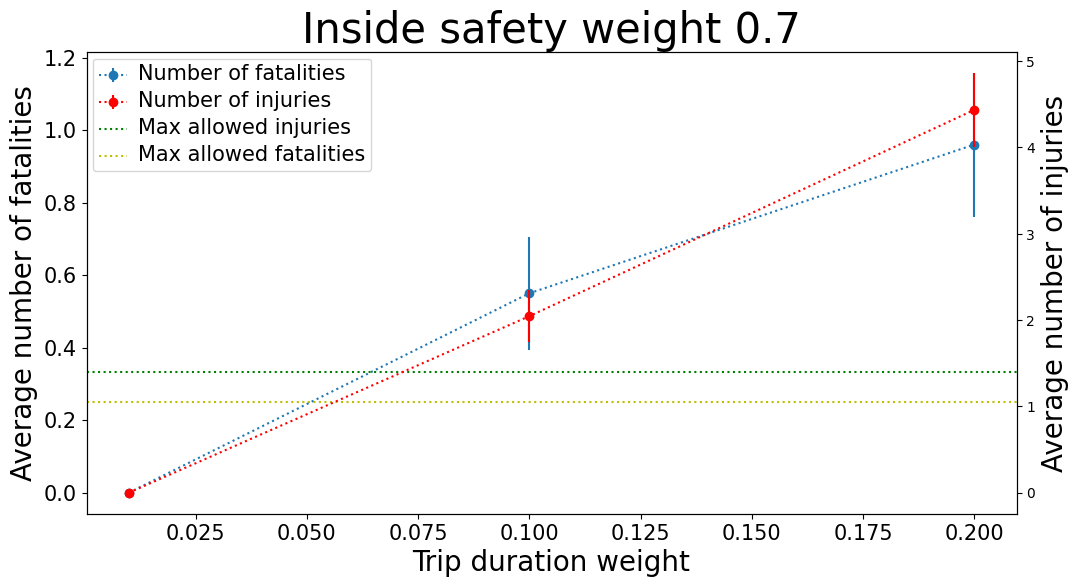

In [60]:
wl = 0.7
mm = means[means.weight_sec_in == wl]
dd = devs[means.weight_sec_in == wl]
##
err_plot(mm, dd, 'weight_comfort', 'n_fat', 'n_inj', 'Number of fatalities', 'Number of injuries',
         [1.4, 0.25], 'Trip duration weight', 'Average number of fatalities', 'Average number of injuries', 
         'Inside safety weight ' + str(wl), 'figs/lia2.png' )


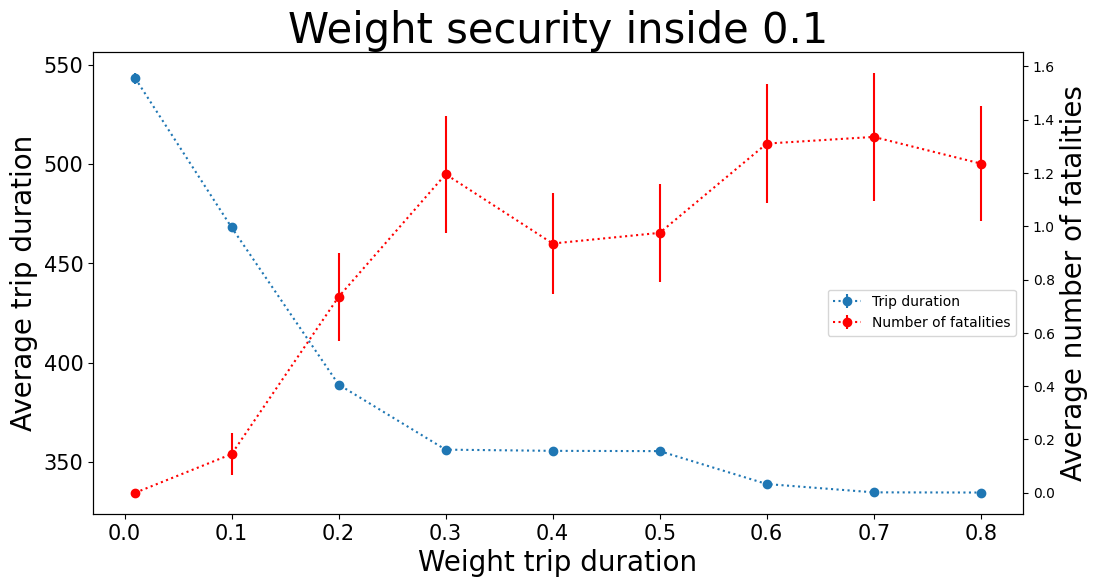

In [155]:
wl = 0.1
mm = means[means.weight_sec_in == wl]
dd = devs[means.weight_sec_in == wl]
##
err_plot(mm, dd, 'weight_comfort',  'trip_duration', 'n_fat',  'Trip duration', 'Number of fatalities',
         None, 'Weight trip duration',  'Average trip duration', 'Average number of fatalities',
         'Weight security inside ' + str(wl) )

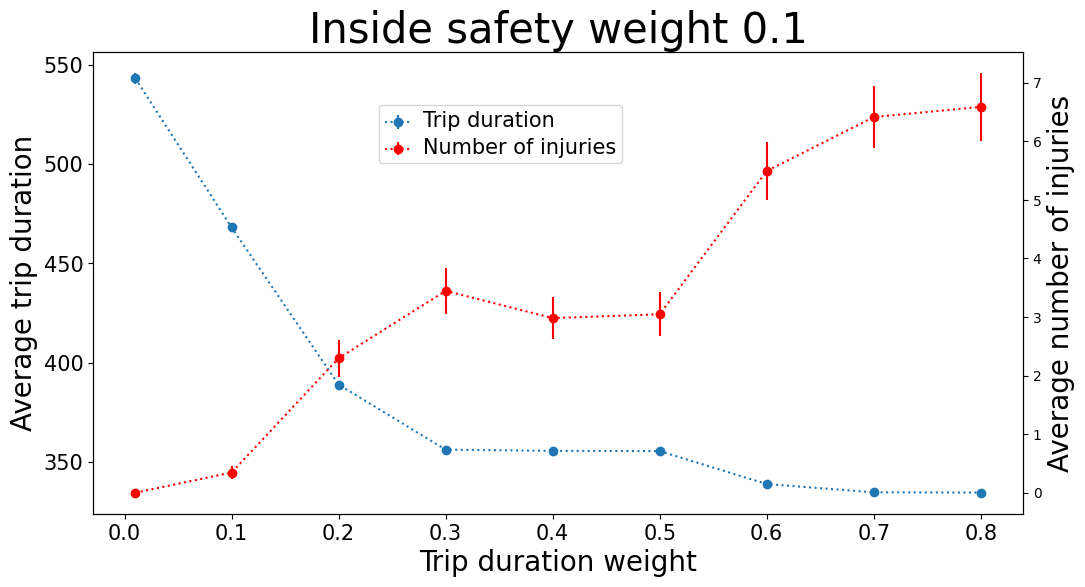

In [87]:
wl = 0.1
mm = means[means.weight_sec_in == wl]
dd = devs[means.weight_sec_in == wl]
##
err_plot(mm, dd, 'weight_comfort',  'trip_duration', 'n_inj',  'Trip duration', 'Number of injuries',
         None, 'Trip duration weight',  'Average trip duration', 'Average number of injuries',
         'Inside safety weight ' + str(wl), 'figs/inj-td.png' )

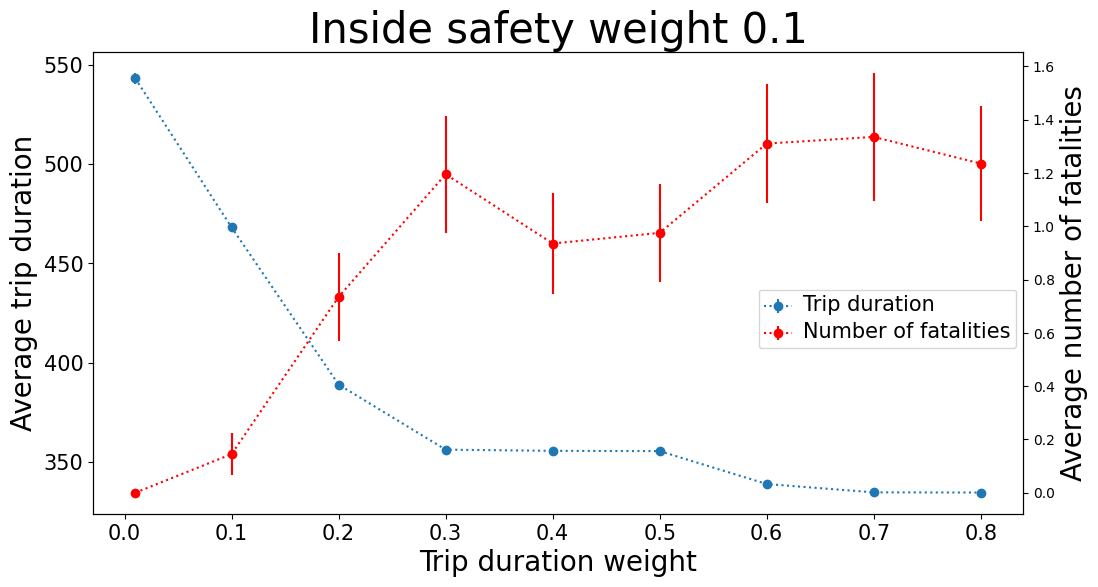

In [92]:
wl = 0.1
mm = means[means.weight_sec_in == wl]
dd = devs[means.weight_sec_in == wl]
##
err_plot(mm, dd, 'weight_comfort',  'trip_duration', 'n_fat',  'Trip duration', 'Number of fatalities',
         None, 'Trip duration weight',  'Average trip duration', 'Average number of fatalities',
         'Inside safety weight ' + str(wl), 'figs/fat-td.png' )

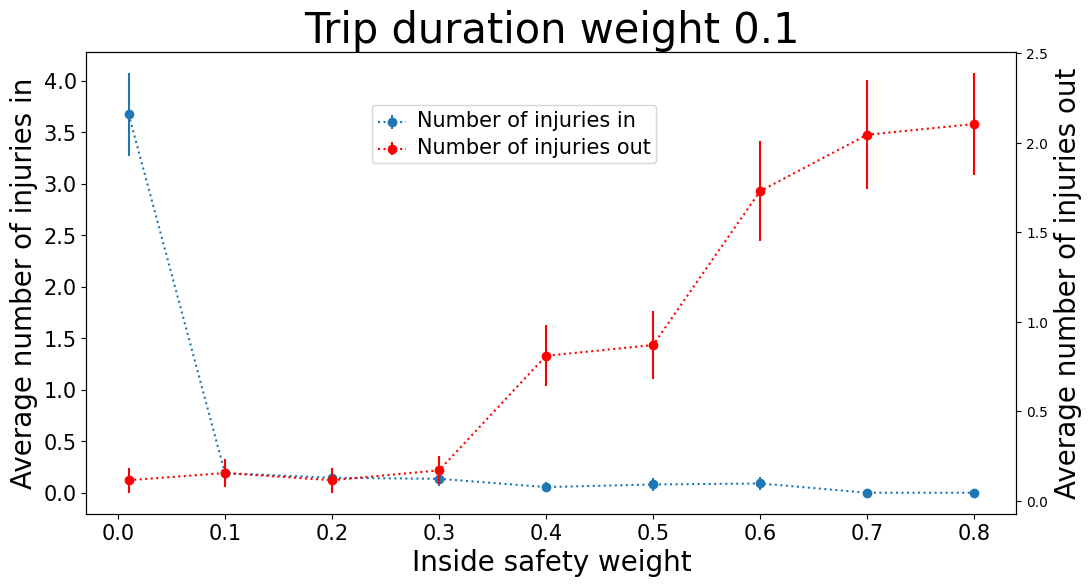

In [85]:
wl = 0.1
mm = means[means.weight_comfort == wl]
dd = devs[means.weight_comfort == wl]
##
err_plot(mm, dd, 'weight_sec_in', 'n_inj_in', 'n_inj_out', 'Number of injuries in ', 'Number of injuries out',
         None, 'Inside safety weight', 'Average number of injuries in', 'Average number of injuries out', 
         'Trip duration weight ' + str(wl), 'figs/inj-in-out.png' )

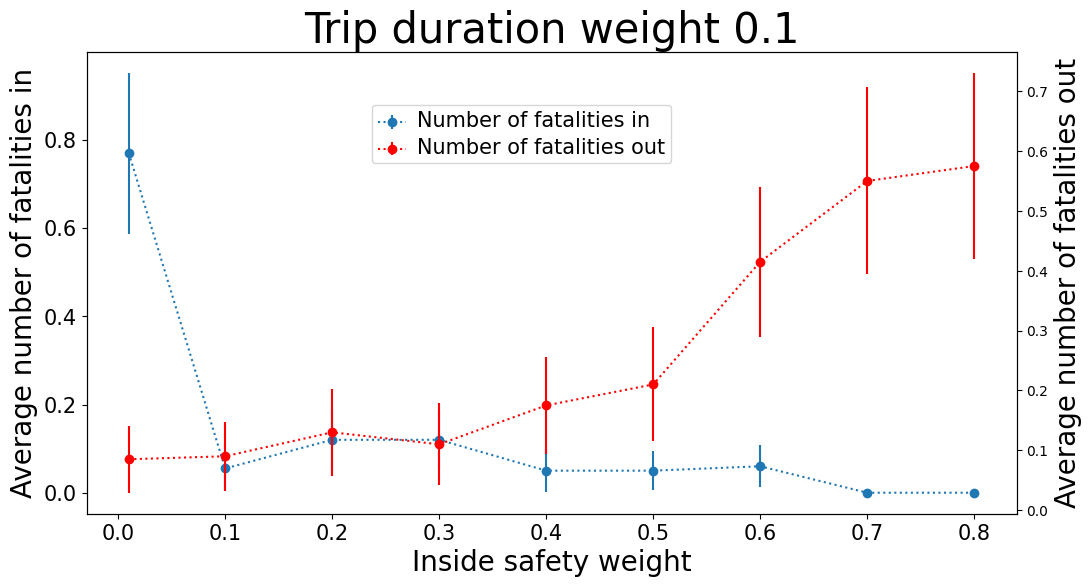

In [86]:
wl = 0.1
mm = means[means.weight_comfort == wl]
dd = devs[means.weight_comfort == wl]
##
err_plot(mm, dd, 'weight_sec_in', 'n_fat_in', 'n_fat_out', 'Number of fatalities in ', 'Number of fatalities out',
         None, 'Inside safety weight', 'Average number of fatalities in', 'Average number of fatalities out', 
         'Trip duration weight ' + str(wl), 'figs/fat-in-out.png' )

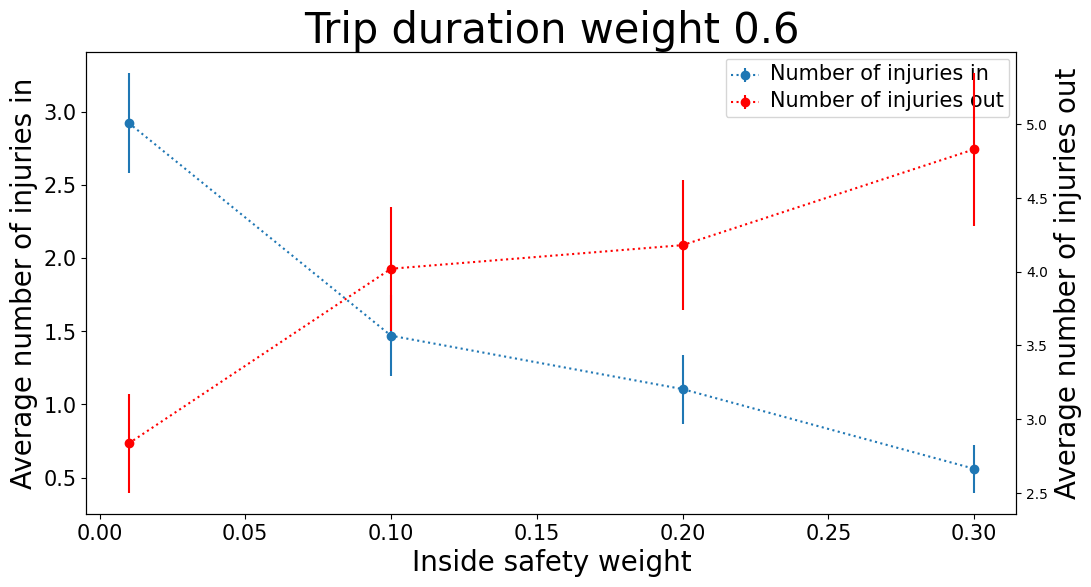

In [68]:
wl = 0.6
mm = means[means.weight_comfort == wl]
dd = devs[means.weight_comfort == wl]
##
err_plot(mm, dd, 'weight_sec_in', 'n_inj_in', 'n_inj_out', 'Number of injuries in ', 'Number of injuries out',
         None, 'Inside safety weight', 'Average number of injuries in', 'Average number of injuries out', 
         'Trip duration weight ' + str(wl), None )

In [49]:
mm

,weight_comfort,weight_sec_in,avg_ut,avg_ut_in,avg_ut_out,avg_ut_speed,crashes,n_accidents,n_fat,n_fat_in,n_fat_out,n_inj,n_inj_in,n_inj_out,skids,trip_duration
46,0.6,0.01,0.958863,-0.15520,-0.16430,1.707487,0.48,38.685,0.735,0.085,0.650,8.200,4.890,3.310,1.640,342.407559
47,0.6,0.10,0.971927,-0.00710,-0.20060,1.721362,0.77,39.520,0.925,0.050,0.875,3.840,0.070,3.770,0.770,339.030679
48,0.6,0.20,0.991292,-0.00175,-0.21830,1.725502,0.00,39.485,0.915,0.010,0.905,4.285,0.025,4.260,0.855,338.006815
49,0.6,0.30,1.014115,-0.00145,-0.20185,1.724557,0.00,39.980,0.755,0.010,0.745,4.260,0.015,4.245,0.725,337.746865
